In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('spam.csv', encoding='cp1252')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2264,ham,Ok . . now i am in bus. . If i come soon i wil...,NaN,NaN,NaN
1634,spam,"Eerie Nokia tones 4u, rply TONE TITLE to 8007 ...",NaN,NaN,NaN
4071,spam,Loans for any purpose even if you have Bad Cre...,NaN,NaN,NaN
4755,ham,Don't make life too stressfull.. Always find t...,NaN,NaN,NaN
4185,ham,"Hmm ok, i'll stay for like an hour cos my eye ...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
# 1 . Data Cleaning
# 2 . EDA(Exploratory Data Analytics)
# 3 . Text Preprocessing
# 4 . Model Building
# 5 . Evaluation
# 6 . Improvement
# 7 . Website
# 8 . Deploy

## 1. Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
# drop last 3 cols(becoz there are very less values in last three cols)
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True, errors='ignore')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
df.sample(5)

,v1,v2
882,ham,I love to give massages. I use lots of baby oi...
2515,ham,Bognor it is! Should be splendid at this time ...
1822,ham,If you're thinking of lifting me one then no.
2050,ham,Hi where you. You in home or calicut?
282,ham,Ok. I asked for money how far


In [12]:
# renaming the columns(for identification of data in cols)
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)
df.sample(5)

,target,text
4281,ham,U can call now...
3827,ham,Where are you ? What are you doing ? Are yuou ...
3787,spam,Want to funk up ur fone with a weekly new tone...
1941,spam,WELL DONE! Your 4* Costa Del Sol Holiday or å£...
2690,spam,sports fans - get the latest sports news str* ...


In [13]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [15]:
df['target']=encoder.fit_transform(df['target'])

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
# checking for duplicate values
df.duplicated().sum()

np.int64(403)

In [19]:
# TO remove duplicates
df= df.drop_duplicates(keep='first')

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.shape

(5169, 2)

## 2.EDA(Exploratory Data Analytics)

In [22]:
# TO check distribution among target 
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [23]:
pip install matplotlib


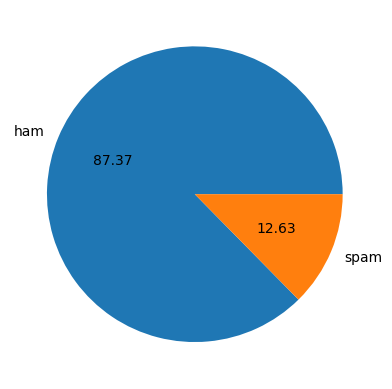

In [24]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [25]:
# Data is Imbalanced(because there are lot of ham massages as compared to spam messages)

In [26]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [27]:
import nltk

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tarun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
# Number of characters
df['num_characters']=df['text'].apply(len)

In [30]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Tarun\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Tarun\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Tarun\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Tarun\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Tarun\AppData\Roaming\nltk_data...
[

True

In [32]:
# Number of Words
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [33]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [35]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
# To find out what is going on tables
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
# For Ham messages
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
# For Spam messages
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [39]:
pip install seaborn

In [40]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

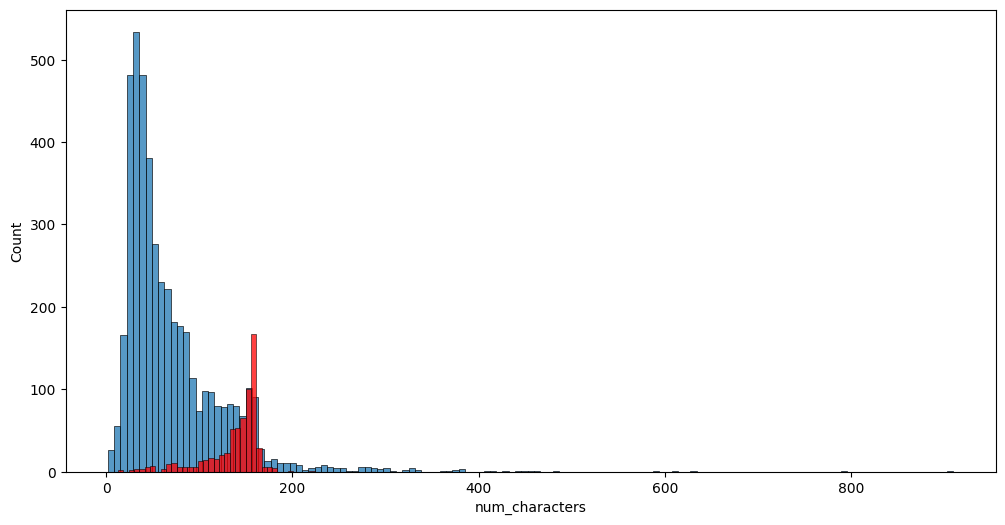

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

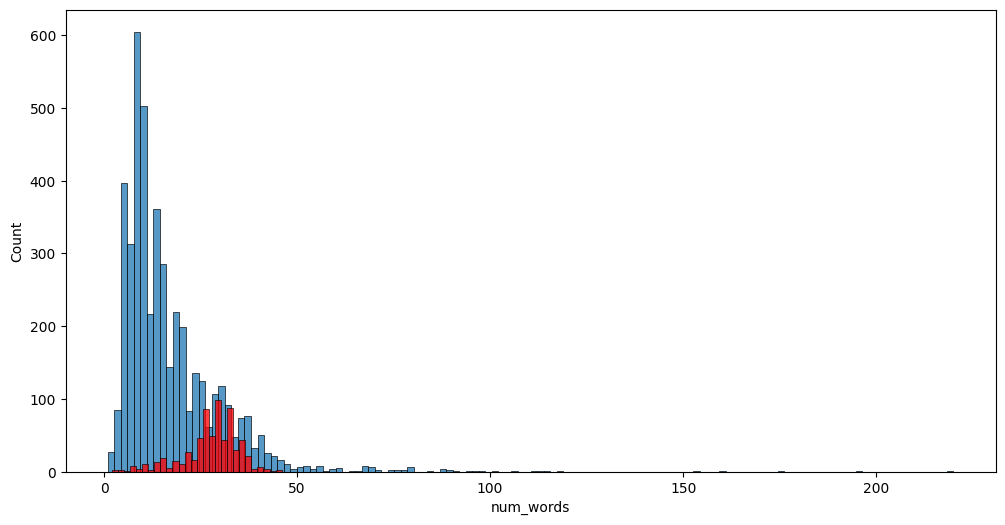

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

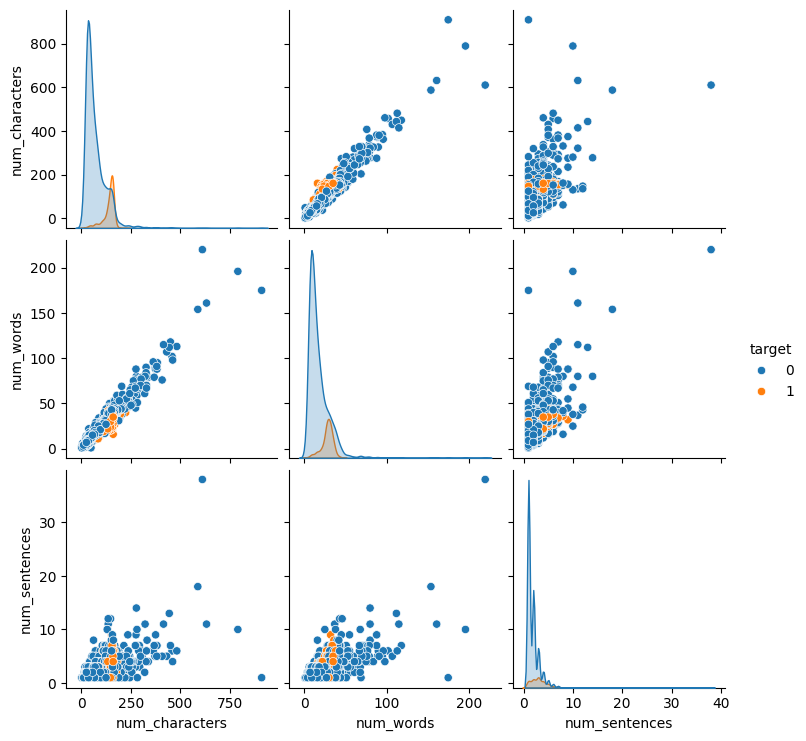

In [43]:
# TO find relation between three cols
sns.pairplot(df,hue='target')

<Axes: >

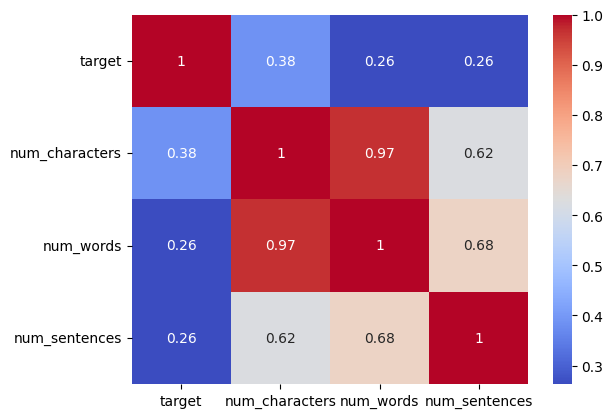

In [44]:
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Generate the heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")


## 3. Data Preprocessing

      . Lower case
      . Tokenization
      . Removing special characters
      . Removing stop words and punctuation
      . Stemming

In [45]:
def transform_text(text):
    text = text.lower()
    return text

In [46]:
transform_text('Hi HOw arE YOu')

'hi how are you'

In [47]:
def transform_text(text):
    text = nltk.word_tokenize(text)
    return text

In [48]:
transform_text('Hi HOw arE YOu')

['Hi', 'HOw', 'arE', 'YOu']

In [49]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [50]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [51]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [52]:
ps.stem('dancing')


'danc'

In [53]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []

    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    
    return " ".join(y)       
                   

In [54]:
print(transform_text('HI I loved watching  all the scientific movie how are you tarun? MY naMe is Tarun and MY friEnd 20 Name %% IS GArvit'))

hi love watch scientif movi tarun name tarun friend 20 name garvit


In [55]:
df['text'][250]

'Ranjith cal drpd Deeraj and deepak 5min hold'

In [56]:
transform_text('Ranjith cal drpd Deeraj and deepak 5min hold')

'ranjith cal drpd deeraj deepak 5min hold'

In [57]:
df['transformed_text'] = df['text'].apply(transform_text)

In [58]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [59]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [60]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [61]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

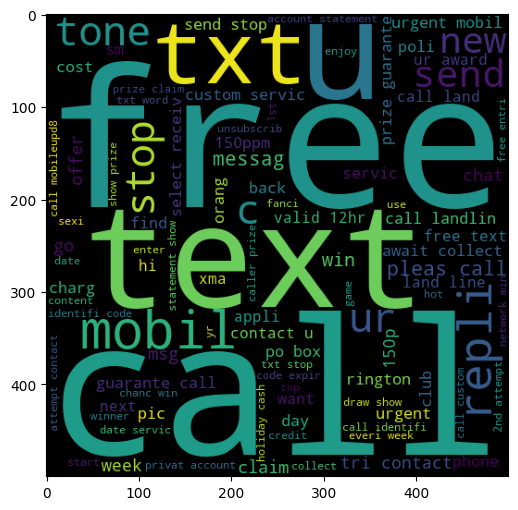

In [62]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [63]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

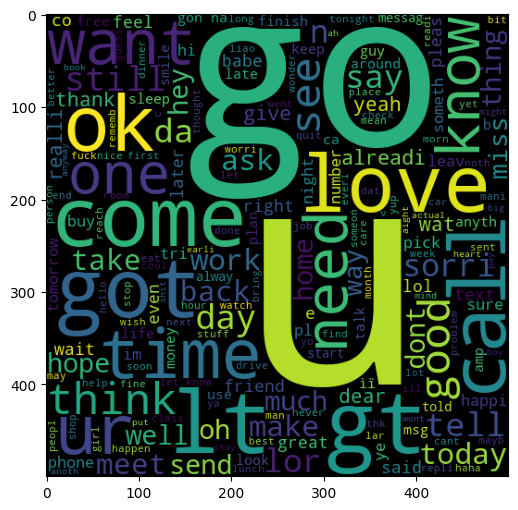

In [64]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [65]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [66]:
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

In [67]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [68]:
len(spam_corpus)

9939

In [69]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


<Axes: ylabel='0'>

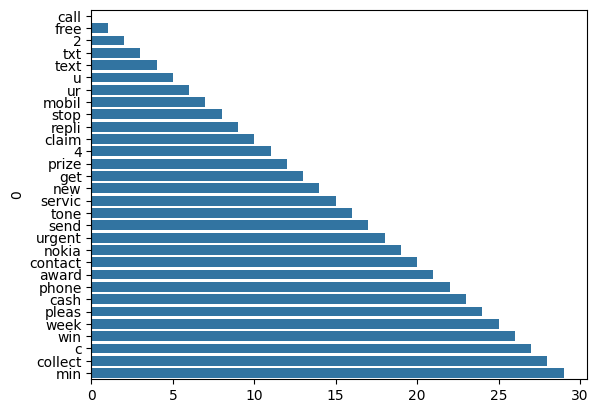

In [70]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])

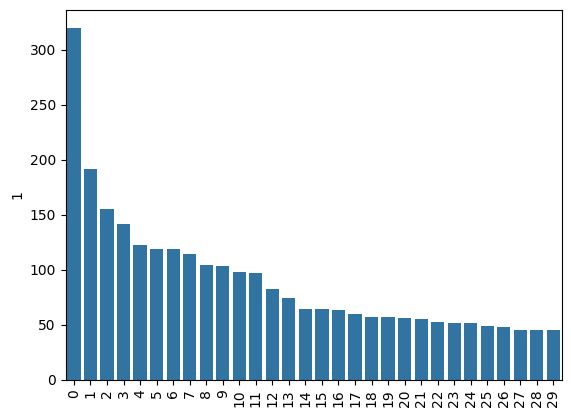

In [71]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [72]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [73]:
len(ham_corpus)

35404

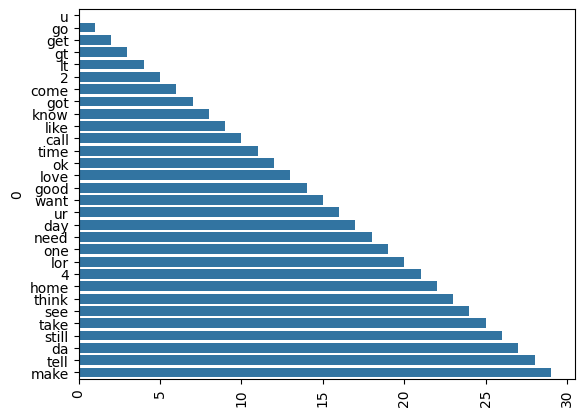

In [74]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [75]:
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer()

In [76]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [77]:
X.shape

(5169, 6708)

In [78]:
y = df['target'].values

In [79]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 2)

In [82]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


In [83]:
gnb = GaussianNB()
mnb =  MultinomialNB()
bnb =  BernoulliNB()

In [84]:
gnb.fit(X_train , y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))
print(precision_score(y_test , y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [85]:
mnb.fit(X_train , y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test , y_pred2))
print(confusion_matrix(y_test , y_pred2))
print(precision_score(y_test , y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [86]:
bnb.fit(X_train , y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test , y_pred3))
print(confusion_matrix(y_test , y_pred3))
print(precision_score(y_test , y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [88]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [89]:
X.shape

(5169, 6708)

In [90]:
y = df['target'].values

In [91]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 2)

In [94]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


In [95]:
gnb = GaussianNB()
mnb =  MultinomialNB()
bnb =  BernoulliNB()

In [96]:
gnb.fit(X_train , y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))
print(precision_score(y_test , y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [97]:
mnb.fit(X_train , y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test , y_pred2))
print(confusion_matrix(y_test , y_pred2))
print(precision_score(y_test , y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [98]:
bnb.fit(X_train , y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test , y_pred3))
print(confusion_matrix(y_test , y_pred3))
print(precision_score(y_test , y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [99]:
import sys
!{sys.executable} -m pip install xgboost


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [101]:
svc = SVC(kernel='sigmoid' , gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc= LogisticRegression(solver='liblinear' , penalty='l1')
rfc = RandomForestClassifier(n_estimators=50 , random_state =2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators = 50 , random_state =2)
etc = ExtraTreesClassifier(n_estimators = 50 , random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators =50 , random_state = 2)
xgb = XGBClassifier(n_estimatoes =50 , random_state =2)

In [102]:
clfs={
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb ,
    'DT' : dtc,
    'LR': lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}


In [103]:
def train_classifier(clf , X_train ,y_train, X_test , y_test):
    clf.fit(X_train , y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test , y_pred)
    precision = precision_score(y_test , y_pred)

    return accuracy , precision
    

In [104]:
train_classifier(svc , X_train , y_train , X_test , y_test)

(0.9729206963249516, np.float64(0.9741379310344828))

In [105]:
accuracy_scores = []
precision_scores = []

for name , clf in clfs.items():
    current_accuracy , current_precision = train_classifier(clf , X_train , y_train , X_test , y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - " , current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0


C:\Users\Tarun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239


C:\Users\Tarun\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:09:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimatoes" } are not used.

  warnings.warn(smsg, UserWarning)


For  xgb
Accuracy -  0.9748549323017408
Precision -  0.9375


In [106]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys() , 'Accuracy' : accuracy_scores , 'Precision' :precision_scores}).sort_values('Precision',ascending = False)

In [107]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
10,xgb,0.974855,0.937500
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [108]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys() , 'Accuracy' : accuracy_scores , 'Precision' :precision_scores}).sort_values('Accuracy',ascending = False)


In [109]:
performance_df

,Algorithm,Accuracy,Precision
10,xgb,0.974855,0.937500
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
5,RF,0.971954,1.000000
6,AdaBoost,0.961315,0.945455
2,NB,0.959381,1.000000
7,BgC,0.958414,0.862595
9,GBDT,0.952611,0.923810
4,LR,0.951644,0.940000
3,DT,0.935203,0.838095


In [110]:
performance_df1 = pd.melt(performance_df , id_vars = "Algorithm")

In [111]:
performance_df1

,Algorithm,variable,value
0,xgb,Accuracy,0.974855
1,ETC,Accuracy,0.972921
2,SVC,Accuracy,0.972921
3,RF,Accuracy,0.971954
4,AdaBoost,Accuracy,0.961315
5,NB,Accuracy,0.959381
6,BgC,Accuracy,0.958414
7,GBDT,Accuracy,0.952611
8,LR,Accuracy,0.951644
9,DT,Accuracy,0.935203


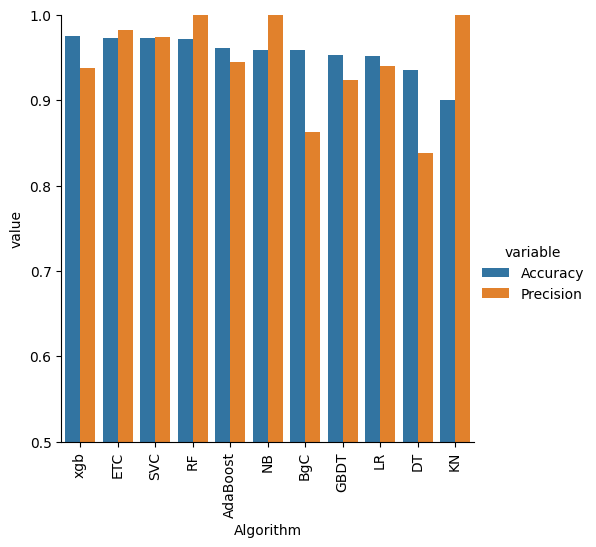

In [112]:
sns.catplot(x = 'Algorithm' , y = 'value',
            hue = 'variable' , data=performance_df1 , kind = 'bar' , height=5)
plt.ylim(0.5 , 1.0)
plt.xticks(rotation='vertical')
plt.show()

## 5. Improvement

#1. Change the max parameter of TFIDF
#2. scaling
#3. Appending

In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [151]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [115]:
# from sklearn.preprocessing import MinMaxScaler
# # scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [116]:
# appending the num_character col to X
# X = np.hstack((X,df['num_characters'].values.reshape(-1 ,1)))

In [152]:
X.shape

(5169, 3000)

In [153]:
y = df['target'].values

In [154]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 2)

In [157]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


In [158]:
gnb = GaussianNB()
mnb =  MultinomialNB()
bnb =  BernoulliNB()

In [124]:
gnb.fit(X_train , y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))
print(precision_score(y_test , y_pred1))

0.8733075435203095
[[790 106]
 [ 25 113]]
0.5159817351598174


In [159]:
mnb.fit(X_train , y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test , y_pred2))
print(confusion_matrix(y_test , y_pred2))
print(precision_score(y_test , y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [126]:
bnb.fit(X_train , y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test , y_pred3))
print(confusion_matrix(y_test , y_pred3))
print(precision_score(y_test , y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [128]:
svc = SVC(kernel='sigmoid' , gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc= LogisticRegression(solver='liblinear' , penalty='l1')
rfc = RandomForestClassifier(n_estimators=50 , random_state =2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators = 50 , random_state =2)
etc = ExtraTreesClassifier(n_estimators = 50 , random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators =50 , random_state = 2)
xgb = XGBClassifier(n_estimatoes =50 , random_state =2)

In [129]:
clfs={
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb ,
    'DT' : dtc,
    'LR': lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}


In [130]:
def train_classifier(clf , X_train ,y_train, X_test , y_test):
    clf.fit(X_train , y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test , y_pred)
    precision = precision_score(y_test , y_pred)

    return accuracy , precision
    

In [131]:
train_classifier(svc , X_train , y_train , X_test , y_test)

(0.9758220502901354, np.float64(0.9747899159663865))

In [132]:
accuracy_scores = []
precision_scores = []

for name , clf in clfs.items():
    current_accuracy , current_precision = train_classifier(clf , X_train , y_train , X_test , y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - " , current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9696969696969697
For  RF
Accuracy -  0.97678916827853
Precision -  0.975


C:\Users\Tarun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9690522243713733
Precision -  0.9732142857142857
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.8692307692307693
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.967479674796748
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307


C:\Users\Tarun\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:19:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimatoes" } are not used.

  warnings.warn(smsg, UserWarning)


For  xgb
Accuracy -  0.9709864603481625
Precision -  0.9426229508196722


In [133]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys() , 'Accuracy' : accuracy_scores , 'Precision' :precision_scores}).sort_values('Precision',ascending = False)

In [134]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.976789,0.975000
0,SVC,0.975822,0.974790
6,AdaBoost,0.969052,0.973214
4,LR,0.956480,0.969697
8,ETC,0.977756,0.967480
10,xgb,0.970986,0.942623
9,GBDT,0.950677,0.930693
7,BgC,0.959381,0.869231


In [135]:
temp_df = pd.DataFrame({'Algorithm' : clfs.keys() , 'Accuracy_max_ft_3000' : accuracy_scores , 'Precision_max_ft_3000' :precision_scores}).sort_values('Accuracy_max_ft_3000',ascending = False)

In [136]:
performance_df.merge(temp_df , on = 'Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.976789,0.975000,0.976789,0.975000
3,SVC,0.975822,0.974790,0.975822,0.974790
4,AdaBoost,0.969052,0.973214,0.969052,0.973214
5,LR,0.956480,0.969697,0.956480,0.969697
6,ETC,0.977756,0.967480,0.977756,0.967480
7,xgb,0.970986,0.942623,0.970986,0.942623
8,GBDT,0.950677,0.930693,0.950677,0.930693
9,BgC,0.959381,0.869231,0.959381,0.869231


In [137]:
temp_df = pd.DataFrame({'Algorithm' : clfs.keys() , 'Accuracy_scaling' : accuracy_scores , 'Precision_scaling' :precision_scores}).sort_values('Accuracy_scaling',ascending = False)

In [138]:
new_df = performance_df.merge(temp_df,on = 'Algorithm')

In [139]:
new_df_scaled = new_df.merge(temp_df,on = 'Algorithm')

In [140]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,AdaBoost,0.969052,0.973214,0.969052,0.973214,0.969052,0.973214
5,LR,0.956480,0.969697,0.956480,0.969697,0.956480,0.969697
6,ETC,0.977756,0.967480,0.977756,0.967480,0.977756,0.967480
7,xgb,0.970986,0.942623,0.970986,0.942623,0.970986,0.942623
8,GBDT,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693
9,BgC,0.959381,0.869231,0.959381,0.869231,0.959381,0.869231


In [141]:
# voting classifier

svc = SVC(kernel = 'sigmoid' , gamma = 1.0 , probability = True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50 , random_state = 2)

from sklearn.ensemble import VotingClassifier

In [142]:
voting = VotingClassifier(estimators = [('svm' , svc) , ('nb' , mnb), ('et' , etc)] ,voting = 'soft')

In [143]:
voting.fit(X_train , y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [144]:
y_pred = voting.predict(X_test)
print("Accuracy" , accuracy_score(y_test , y_pred))
print("Precision", precision_score(y_test , y_pred))

Accuracy 0.9796905222437138
Precision 0.9834710743801653


In [145]:
# Applying stacking
estimators = [('svm' , svc) , ('nb' , mnb), ('et' , etc)]
final_estimator=RandomForestClassifier()

In [146]:
from sklearn.ensemble import StackingClassifier

In [147]:
clf = StackingClassifier(estimators = estimators , final_estimator = final_estimator)

In [148]:
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test , y_pred))
print("Precision" , precision_score(y_test , y_pred))

Accuracy 0.9796905222437138
Precision 0.9398496240601504


In [160]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb , open('model.pkl' , 'wb'))